# Chapter 04
# 벡터공간 - The Vector Space

### 4.1.1 선형결합의 정의

* **Definition 4.1.1** : $v_1, …,v_n$ 각각을 벡터라고 하면, $v_1, …,v_n$ 의 *선형결합* 을 다음과 같은 합이라고 정의하자.

  $$\alpha_1v_1+ \cdots +\alpha_nv_n$$

  여기서, $\alpha_1,…,\alpha_n$은 스칼라이다. 이 선형결합에서 $\alpha_1,…,\alpha_n$ 각각은 *계수*라고 한다. $\alpha_1$은 $v_1$의 계수이고, $\alpha_2$는 $v_2$ 의 계수이며, ..., $\alpha_n$은 $v_n$의 계수이다.

### 4.1.2 선형결합의 사용

***Example 4.1.5 평균얼굴*** - p.126 <br />
이미지의 평균을 선형결합으로 나타낼 수 있다.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# 이미지 파일 불러오기
u = Image.open('./images/img01.PNG')
v = Image.open('./images/img02.PNG')
w = Image.open('./images/img03.PNG')
u = u.convert('L')
v = v.convert('L')
w = w.convert('L')
v = v.resize(u.size)  # 이미지 사이즈를 u의 사이즈와 같게 맞추기
w = w.resize(u.size)

# 이미지 파일을 np.asarray를 이용해 배열로 만들기
u = np.asarray(u, dtype='float32')
v = np.asarray(v, dtype='float32')
w = np.asarray(w, dtype='float32')

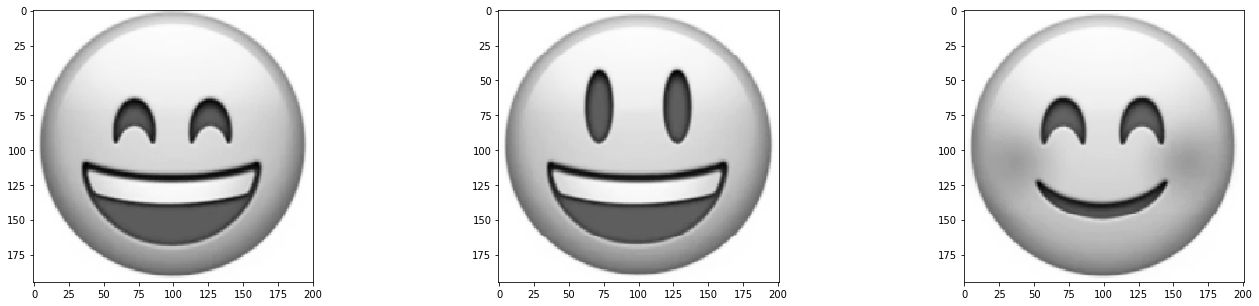

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.001)

img_org = [u, v, w]

for i, img in enumerate(img_org):
    axs[i].imshow(img ,cmap='Greys_r')

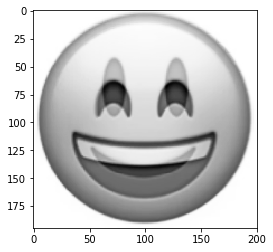

In [5]:
# 스칼라 (1/3)을 곱하여 선형결합 하기
lin_comb = (1/3) * (u + v + w)
plt.imshow(lin_comb, cmap='Greys_r')

### 4.1.3 계수에서 선형결합으로 

길이가 $n$인 벡터들의 리스트 $[v_1,…,v_n]$에 대해, 길이가 $n$인 계수들의 리스트 $[\alpha_1,...,\alpha_n]$를 대응하는 선형결합 $\alpha_1v_1+ \cdots +\alpha_nv_n$에 매핑하는 함수 $f$가 있다. 이 함수는 주어진 정의역(domain)원소에 대해 함수의 상(image, 함수값)을 찾는 문제라고 볼 수 있다. <br />
***Quiz 4.1.7*** `lin_comb(vlist, clist)`를 정의해 보자.

In [6]:
def lin_comb(vlist, clist):
    return sum([coeff * v for coeff, v in zip(vlist, clist)])

vlist = [1, 2, 3]
clist = [2, 2, 2]
lin_comb(vlist, clist)

12

## 4.2 생성(Span)

- **Definition** : 벡터들 $v_1,…,v_n$의 모든 선형결합으로 이루어진 집합을 이 벡터들의 **생성(Span)**이라 하고 $Span \{v_1, ...,v_n\}$ 라고 쓴다.

실수$\mathbb{R}$ 또는 복소수$\mathbb{C}$와 같은 무한 필드 위의 벡터들에 대해, Span은 보통 무한집합이다. 유한필드인 $GF(2)$상의 벡터들에 대한 Span은 유한하다.

***Quiz 4.2.2*** 필드 $GF(2)$상의 $Span\{[1,1],[0,1]\}$ 에 몇 개의 벡터가 있는가?

$$\begin{eqnarray} 0[1,1]+0[0,1] & = & [0,0] \\ 0[1,1]+1[0,1] & = & [0,1] \\ 1[1,1]+0[0,1] & = & [1,1] \\ 1[1,1]+1[0,1] & = & [1,0] \end{eqnarray}$$

***Quiz 4.2.4*** $2$-벡터들로 구성되는 집합에서 공집합$\emptyset $의 생성에는 몇 개의 벡터가 있는가?

빈 할당(empty assignment)으로 $[0, 0]$

***Quiz 4.2.5*** $\mathbb{R}$상의 $2$-벡터 $[2,3]$의 생성 즉, $Span\{[2,3]\}$에는 몇 개의 벡터가 있는가?

\>\>Answer : $Span\{\alpha [2,3]:\alpha \in \mathbb{R}\}$이다. 즉 무한개가 있다. 원점과 $[2,3]$을 지나는 직선 위의 점들을 구성한다.

***Quiz 4.2.6*** $Span \{v\}$ 가 유한개의 벡터들로 구성되는 $\mathbb{R}$상의 2-벡터 $v$는 무엇인가?

\>\>Answer : 영벡터$[0,0]$ 이다.

4.2.2  선형방정식들의 시스템이 암시하는 다른 방정식들 - *생략*

### 4.2.3 생성자(Generator)

* **Definition** : $\Upsilon $을 벡터들의 집합이라 하고, 만약 $v_1,...,v_n$이 $\Upsilon = Span\{v_1,...,v_n\}$을 만족하는 벡터들이면, $\{v_1,…,v_n\}$은 $\Upsilon$에 대한 *생성집합(generating set)*이라 하고 벡터 $v_1,...,v_n$을 $\Upsilon$에 대한 *생성자(generator)* 들이라고 한다.

***Example 4.2.11*** $\{[3,0,0], [0,2,0], [0,0,1]\}$은 $\mathbb{R}^3$에 대한 생성집합이라고 하기 위해서는 아래의 두 가지를 보여줘야 한다.

1. 모든 선형결합은 $\mathbb{R}^3$ 내의 벡터이다.
2. $\mathbb{R}^3$ 내의 모든 벡터는 선형결합이다.

첫 번째 경우는 $\mathbb{R}^3$가 $\mathbb{R}$상의 모든 3-벡터들을 포함하므로 명백하다. 두 번째의 경우를 증명하기 위해서는 $[x, y, z]$를 $\mathbb{R}^3$내의 임의의 벡터라고 하자. $[x,y,z]$는 선형결합으로 쓸 수 있음을 보여야한다. 

$$[x,y,z] = \frac{x}{3} [3,0,0] + \frac{y}{2} [0,2,0] + z[0,0,1]$$ 

### 4.2.4 선형결합의 선형결합

위의 Example 4.2.11에서 $\mathbb{R}^3$에 대한 또 다른 생성집합은 $\{[1,0,0],[1,1,0],[1,1,1]\}$ 이라고 하면 이 집합의 생성(Span)이 $\mathbb{R}^3$의 모든 생성을 포함한다는 것을 증명해야 한다. 위의 $\{[3,0,0], [0,2,0], [0,0,1]\}$ 벡터 각각을 선형결합으로 나타내면 된다.

$$[3,0,0] = 3[1,0,0] \\ [0,2,0] = -2[1,0,0] + 2[1,1,0] \\ [0,0,1] = -1[1,0,0]-1[1,1,0]+1[1,1,1]$$


### 4.2.5 표준 생성자 (Standard generator)

위의 Example 4.2.11에서 $[x,y,z]$를 벡터 $[3,0,0],[0,2,0],][0,01]$의 선형결합으로 표현하는 식을 보았다. 이 식은 세 개의 벡터들이  특수한 형태를 가지기 떄문이다. 만약 $[1, 0, 0], [0,1,0],[0,0,1]$을 사용한다면 더욱 간단하게 표현할 수 있다. 

$$[x,y,z] = x[1,0,0]+y[0,1,0]+z[0,0,1]$$

위의 세 벡터를 $\mathbb{R}^3$에 대한 표준 생성자라 하고 $e_0, e_1, e_2$ 로 나타낸다. 예를 들어, $\mathbb{R}^4$에 대한 표준 생성자는 $e_0, e_1, e_2, e_3$을 사용하고 $[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]$ 을 의미한다. <br />

임의의 양의 정수 $n$에 대해, $\mathbb{R}^n$에 대한 표준 생성자는 아래와 같다.

$$e_0 = [1,0,0,0,…,0] \\ e_1=[0,1,0,0,…,0] \\ e_2=[0,0,1,0,…,0] \\ \vdots \\ e_{n-1} = [0,0,0,0,…,1]$$

***Quiz 4.2.13*** 함수, `standard(D, one)`을 작성해보자. 이 함수는 주어진 정의역 `D`와 주어진 숫자 `one`에 대해 $\mathbb{R}^D$에 대한 표준 생성자들의 리스트를 리턴한다.

In [7]:
from vec import Vec

def standard(D, one):
    return [Vec(D, {k: one/one}) for k in D]

standard({'A', 'B', 'C'}, 2)

[Vec({'A', 'C', 'B'},{'A': 1.0}),
 Vec({'A', 'C', 'B'},{'C': 1.0}),
 Vec({'A', 'C', 'B'},{'B': 1.0})]

## 4.3 벡터들의 집합에 대한 기하학적 구조

### 4.3.1 $\mathbb{R}$상의 벡터들의 생성에 대한 기하학적 구조

하나의 영이 아닌 벡터 $v$의 모든 선형결합에 대해 고려해 보자.

$$Span\{v\} = \{\alpha v : \alpha \in \mathbb{R}\}$$

위의 집합은 원점과 점 $v$를 지나는 직선을 형성한다. 직선은 1차원 객체이다. 공집합에 대한 Span은 영벡터이며, 이러한 생성(Span)은 0차원 객체로써 하나의 점으로 구성된다. <br />

***Example 4.3.1*** $Span\{[1,0],[0,1]\}$ 은 무엇일까? 이 벡터들은 $\mathbb{R}^2$에 대한 표준 생성자들이고 따라서, 모든 2-벡터는 생성(Span) 내에 있다. 즉, $Span\{[1,0],[0,1]\}$은 *유클리드 평면* 의 모든 점을 표현한다. <br />

***Example 4.3.4*** 모든 두 개의 서로 다른 벡터들은 평면을 생성할까? $Span\{[1,2],[2,4]\}$은 평면을 생성할까? 이 집합의 선형결합은 다음과 같이 쓸 수 있다.

$$\begin{eqnarray} \alpha _{ 1 }[1,2]+\alpha _{ 2 }[2,4] & = & \alpha _{ 1 }[1,2]+\alpha _{ 2 }(2[1,2]) \\  & = & \alpha _{ 1 }+(\alpha _{ 2 }\cdot 2)[1,2] \\  & = & (\alpha_{1} + 2\alpha_{2})[1,2] \end{eqnarray}$$

따라서, $Span\{[1,2],[2,4]\} = Span\{[1,2]\}$ 이다. 즉, 평면이 아니라 직선을 형성한다. 위의 예들을 통해, $\mathbb{R}$상의 두 벡터의 생성은 평면 또는 평면보다 차원이 낮은 객체(직선 또는 점)이다. 임의의 벡터들의 집합에 대한 생성은 원점을 포함해야 한다. 그이유는 모든 계수가 0인 경우 원점이기 때문이다. <br />

점, 직선, 또는 평면과 같은 기하적 객체는 *플랫(flat)* 라 한다.

- **Hypothesis** : $\mathbb{R}$상의 $k$ 벡터들의 Span(생성)은 원점을 포함하는 $k$-차원의 flat 또는 원점을 포함하는 더 낮은 차원의 flat을 형성한다.  
  - 영벡터의 생성(Span)은 점, 즉 영차원 객체를 형성한다. 바로 원점이다.
  - 하나의 벡터의 생성은 원점을 지나는 직선, 즉 1차원의 객체, 또는 원점을 형성한다. 
  - 두 벡터의 생성은 원점을 지나는 평면, 즉 2차원 객체, 또는 원점을 지나는 직선, 또는 원점을 형성한다. 

### 4.3.2 동차 선형시스템의 해집합에 대한 기하학적 구조

평면을 표현하는 좀 더 익숙한 방법은 방정식이다. 예를 들어 $\{(x,y,x) \in \mathbb{R}^3 : ax+by+cz=d\}$이다. 원점이 방정식 $ax+by+cz=d$를 만족하기 위해서는 $d$는 $0$이어야 한다. 앞으로의 예제나 개념들은 원점 $(0,0,0)$을 포함하는 평면에 대해 설명한다.<br />

***Example 4.3.7*** 평면 $Span \{[1,0,1.65],[0,1,1]\}$은 다음과 같이 나타낼 수 있다.

$$\{(x,y,z) \in \mathbb{R}^3 : 1.65x + 1y-1z=0\}$$

위의 방정식을 도트곱을 이용하면 아래와 같이 쓸 수 있다.

$$\{[x,y,z] \in \mathbb{R}^3 : [1.65,1, -1]\cdot [x,y,z]=0\}$$

위의 식을 `matplotlib` 모듈을 이용하여 코드로 나타내면 다음과 같다.

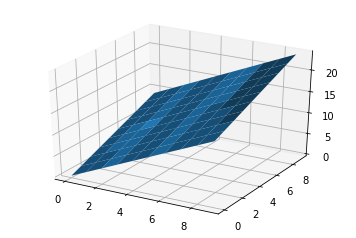

In [8]:
from mpl_toolkits.mplot3d import Axes3D

xx, yy = np.meshgrid(range(10), range(10))

zz = 1.65*xx + 1.0*yy  # 1.65x + 1y = 1z

ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, zz)
plt.show()

- **Definition** : 우변이 모두 $0$인 선형시스템(선형방정식들의 컬렉션)은 *동차 선형시스템 (homogeneous linear system)*이라고 한다. 
- **Hypothesis** : 원점을 포함하는 flat은 동차 선형시스템의 해집합이다.

### 4.3.3 원점을 포함하는 flat의 두 가지 표현

위에서 원점을 포함하는 *flat*을 나타내는 두 가지 방법을 살펴보았다. 

- *어떤 벡터들의 $Span$(생성)을 이용*
- *동차 선형시스템의 해집합을 이용*

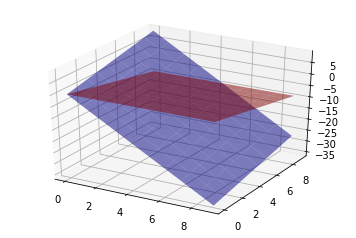

In [10]:
xx, yy = np.meshgrid(range(10), range(10))

z1 = -4*xx + yy
z2 = -1*yy
ax = plt.subplot(projection='3d')
ax.plot_surface(xx, yy, z1, color='blue', alpha=.5, linewidth=0, zorder=-1)
ax.plot_surface(xx, yy, z2, color='red', alpha=.5, linewidth=0, zorder=1)
plt.show()

## 4.4 벡터공간

### 4.4.1 두 표현의 공통점은 무엇인가?

4.4.3에서 설명한 두 가지 표현법에 대한 연관성을 알아보자. $F^D$의 부분집합 $\mathcal{V}$ 는 $\mathcal{V}$가 $F$ 상의 어떠 $D$-벡터들의 생성(Span)이거나 선형시스템의 해가 되거나에 상관없이 아래의 세 가지 성질을 가진다.

- ***Property*** $\mathbf{V1}$ : $\mathcal{V}$는 영벡터를 포함한다.
- ***Property*** $\mathbf{V2}$ : 모든 벡터 $v$에 대해, 만약 $\mathcal{V}$가 $v$를 포함하면 $\mathcal{V}$는 모든 스칼라 $\alpha$에 대해 $\alpha v$를 포함하고 ''스칼라-벡터 곱에대해 닫혀있다''라고 한다..
- ***Property*** $\mathbf{V3}$ : 모든 벡터들의 쌍 $u, v$ 에 대해, 만약 $\mathcal{V}$가 $u,v$를 포함하면 $\mathcal{V}$는 $u+v$를 포함하고 $\mathcal{V}$는 벡터 덧셈에 대해 *닫혀* 있다.

$\mathcal{V} = Span\{v_1, …,v_n\}$이라고 하면, $\mathcal{V}$는 다음을 만족한다.

![](./images/vec_space01.PNG)

이제, $\mathcal{V}$는 해집합 $\{x:a_1\cdot x=0, …, a_m \cdot x =0\}$ 이라고 하면, $\mathcal{V}$는 다음을 만족한다.

![](./images/vec_space02.PNG)

### 4.4.2 벡터공간의 정의와 예

- **Definition** : 벡터들의 집합 $\mathcal{V}$는 ***Property*** $\mathbf{V1}, \mathbf{V2}, \mathbf{V3}$을 만족하면 ***벡터공간*** 이라고 한다.
  - 따라서, 어떤 벡터들의 생성(Span)은 벡터공간이다.
  - 또한, 동차 선형시스템(homogeneous linear system)의 해집합은 벡터공간이다.
  - 원점을 포함하는 (직선 or 평면) *flat*은 어떤 벡터들의 생성(Span) 또는 선형시스템의 해집합으로 표현할 수 있으므로 벡터공간이다. 
  - 임의의 필드 $F$와 임의의 유한 정의역 $D$에 대해, $F$상의 $D$-벡터들의 집합 $F^D$는 벡터공간이다. <br />
    $\rightarrow$ $F^D$는 영벡터를 포함하고 스칼라-벡터 곱과 벡터 덧셈에 대해 닫혀있다. 예를 들어, $\mathbb{R}^2, \mathbb{R}^3, GF(2)^4$는 벡터공간이다.
  - 임의의 필드 $F$와 임의의 유한 정의역 $D$에 대해, 영벡터로 구성되는 한 원소 집합 $0_D$는 벡터공간이다.

![](./images/proof01.PNG)

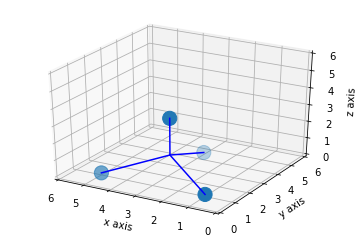

In [12]:
import math as m

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = [1, 5, 3, 3]
y = [1, 1, 1+(2* m.sqrt(3)), 1 +(2/3)*m.sqrt(3)]
z = [0, 0, 0, 4* m.sqrt(2)/m.sqrt(3)]

a = []
b = []
c = []
for item in x:
    a.append(float(item))
for item in y:
    b.append(float(item))
for item in z:
    c.append(float(item))

r = np.array(a)
s = np.array(b)
t = np.array(c)

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")


ax.scatter(r,s,zs = t, s=200)

for x, y, z in zip(r, s, t):
    ax.plot3D([x, 3], [y, 1+(2*(3**(1/2))/3)], [z, 4*(2**(1/2))/(3*(3**(1/2)))], 'b')

ax.set_ylim([0,6]) ##EDITED FIX TO AXES LABEL PROBLEM
ax.set_xlim([6,0])
ax.set_zlim([0,6])

plt.show()